---
#### CS 260 Database and Data Visualizsation - Final Project - SP24
- Ifrahim Ansari
- Jonathan Nelson
---

# The Registered Population of Electric Vehicles in Washington State

In [1]:
# imports go here
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
#HINT: what 3 did we use in the group by HW?  Delete this comment when the 3 imports have been added.

/var/folders/3s/qb0y1rz13z35lgzcbh9yyv800000gn/T/ipykernel_32392/4097674448.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### By: Johnathan Nelson, Ifrahim Ansari


**LINK: https://github.com/IfrahimA/final_project/blob/main/electric_vehicle_population.csv**

---

## 1. Introduction

For this project, our group conducted an examination of the electric vehicle population within the state of Washington, analyzing with a focus on the types and distribution of electric vehicles.

---

## 2. Data

A direct link to the data can be found at the following website.
 * https://catalog.data.gov/dataset/electric-vehicle-population-data

The data was obtained from the Washington State Department of Licensing (DOL) and represents currently registered Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs). The dataset likely includes information collected through vehicle registration records maintained by the DOL, in the earliest around 1996, to present day. The sample includes approx. 177,865 registered vehicles in the state of Washington, and also includes vehicles apart of other states, that are currently registered under Washington. The specific timeframe for when the data was obtained would depend on when the vehicle was registered, accessed, and then displayed on the dataset. The dataset provides no additional information in regards to timeframe when the data obtained.






In [2]:
#In this cell, we load the data.
try:
    #load the csv data from github
    csv_data = pd.read_csv("https://raw.githubusercontent.com/IfrahimA/final_project/main/electric_vehicle_population.csv")

    #Connect to a database - change "example.db" to a database that makes sense for your data.
    conn = sql.connect('ev.db')

    #Load the csv data into a table using the connection to the db
    #that you just created in the previous line.
    csv_data.to_sql('ev', conn, index = False)

except ValueError:
    print("""A ValueError occurred. If you've run this cell twice,
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

In [4]:
#Show the rows of the table.
sql_statement = """SELECT DISTINCT(clean_alternative_fuel_vehicle)
                   FROM ev
                """
results = pd.read_sql_query(sql_statement, conn)
results

,clean_alternative_fuel_vehicle
0,Clean Alternative Fuel Vehicle Eligible
1,Eligibility unknown as battery range has not b...
2,Not eligible due to low battery range


### 2.1 Summary of Variables within the Electric Vehicles(ev) Table

The Electric Vehicles table has 15 columns/variables and 177866 rows.  All variables are explained in this section.

Note that the table was read in from a csv, but had we created a formal SQLite database for the table, the schema would have been as follows.

```
CREATE TABLE ""."Electric Vehicles" (
	"vin"	TEXT NOT NULL,
	"county"	TEXT,
	"city"	TEXT,
	"state"	TEXT,
	"postal_code"	INTEGER NOT NULL,
	"model_year"	INTEGER NOT NULL,
	"make"	TEXT NOT NULL,
	"model"	TEXT NOT NULL,
	"electric_vehicle_type"	TEXT NOT NULL,
	"clean_alternative_fuel_vehicle"	TEXT NOT NULL,
	"electic_range"	INTEGER,
	"base_msrp"	INTEGER,
	"electric_utility"	TEXT NOT NULL,
    "latitude" REAL NOT NULL,
    "longitude" REAL NOT NULL
	PRIMARY KEY("vin")
);
```

Here are the variables, their descriptions, their units, their types, and some descriptive statistics.

**CATEGORICAL VARIABLES**


* **vin** – identification for each electric vehicle
    * Number of missing values: 0
    * Contains 10,316 distinct values - Examples:
        *  3C3CFFGE4E - FIAT 500
        *  5YJXCBE40H - Tesla Model X
        * 3MW39FS03P - BMW 330E
    
    * Each vin number is unique and corresponds to a select vehicles when they are manufacturered.

* **County** – country where the car is located
    * Number of missing values: 5
    * Contains 187 distinct values - Examples:
        * Yakima, WA  
        * Thurston, WA
        * Philadelphia, WA

* **City** – city location of where the car is located
    * Number of missing values: 5
    * Contains 704 distinct values - Examples:
        * Olympia, WA
        * Renton, WA
        * Bothell, WA

* **State** – state location where the car is located
    * Number of missing values: 5
    * Contains 704 distinct values - Examples:
        * Washington (WA)
        * California (CA)
        * New York (NY)

* **Make Name of Company** – name of the manufacturer that makes the car
    * Number of missing values: 0
    * Contains 38 distinct values - Examples:
        * Fiat
        * Tesla
        * Toyota
        * Nissan
        * Honda

* **Model** – product name to identify the subset of cars of each manufacturer
    * Number of missing values: 0
    * Contains 137 distinct values - Examples:
        * Model X by Tesla
        * BOLT EV by Chevy
        * PACIFICA by Chrysler

* **Electrical Vehicle Type** – divided into a select type of electric vehicles hybrid electric or battery electric.
    * Number of missing values: 0
    * Contains 2 distinct values - Examples:
        * Battery Electric Vehicle (BEV)
        * Plug-in Hybrid Electric Vehicle (PHEV)
    * BEVs run solely on electricity stored in a battery, while PHEVs can switch between electricity and gasoline for power.

* **Clean Alternative Fuel Vehicle** – considers if the vehicle is eligible for alternative fuel options
    * Number of missing values: 0
    * Contains 3 distinct values - Examples:
        * Clean Alternative Fuel Vehicle Eligible
        *	Eligibility unknown as battery range has not been registered.
        * Not eligible due to low battery range
    * This shows if the vehicle can use alternative fuels, such as electricity for EVs.

* **Electric Utility** – displays an authority that distributes electrical energy for the specified vehicle
    * Number of missing values: 0
    * Contains 76 distinct values - Examples:
        * PACIFICORP - Electric Services Provider based in West Coast
        * PUGET SOUND ENERGY INC - Electric Service Provider based in Washington
        * MODERN ELECTRIC WATER COMPANY - Electric Service Provider based in Spokane Valley, Washington

**QUANTITATIVE  DISCRETE VARIABLES**

* **Postal Code** – zip code of the location where the vehicle is registered
    * Number of missing values: 5
    * max value: 99577
    * min value: 1730
    * average value: 98173

* **Model Year** – year that the car was manufactured
    * Number of missing values: 0
    * max value: 2024
    * min value: 1997
    * average value: 2020
    * There are more modern cars, compared to cars that were manufactured in the early 2000s.

* **Electric Range** – refers to the distance (miles) a vehicle can travel solely on electric power before needing to recharge its battery or switch to another power source.
    * Number of missing values: 0
    * Units: Miles
    * max value: 337
    * min value: 0
    * average value: 61.5
    * All-electric vehicles can travel between 110 to over 300 miles on a single charge, while plug-in hybrid electric vehicles (PHEVs) typically cover 15 to 60 miles solely on battery power before the engine engages when the battery is depleted.

* **Base MSRP** – displays the Manufacturer’s Suggested Retail Price (MSRP)
    * Number of missing values: 174522 (Represented by 0's)
    * Units: Dollars ($)
    * max value: $845,000
    * min value: $0
    * average value: $57173.42
    * In this scenario, the database creator listed the MSRP of vehicles as $0 instead of reporting them as null. It's important to note that every car originally has an MSRP value, so listings with $0 do not accurately reflect the actual MSRP of the vehicle.

**QUANTITATIVE  CONTINUOUS VARIABLES**

* **Longitude** – displays the longitude coordinates of the vehicles and their location
    * Number of missing values: 9
    * Units: Decimal Degrees
    * max value: -70.873801
    * min value: -159.71248
    * average value: -122.030845

* **Latitude** – displays the latitude coordinates of the vehicles and their location
    * Number of missing values: 9
    * Units: Decimal Degrees
    * max value: 61.323155
    * min value: 19.61021
    * average value: 47.442058




### 2.2 Code used to Summarize Variables

In this section we include the code used to describe the variables in the previous section.


In [ ]:
#Get the distinct values in the vin column
sql_statement = """
                    SELECT DISTINCT(vin)
                    FROM ev
                    """

results = pd.read_sql_query(sql_statement, conn)
results

,vin
0,5YJYGDEE1L
1,7SAYGDEE9P
2,5YJSA1E4XK
3,5YJSA1E27G
4,5YJYGDEE5M
...,...
10825,SADHC2S17K
10826,7JRH60FM3R
10827,YV4BR00Z6N
10828,1C4RJYE62P


In [ ]:
#Get the distinct values in the county column
sql_statement = """
                    SELECT DISTINCT(county)
                    FROM ev
                    """

results = pd.read_sql_query(sql_statement, conn)
results

,county
0,King
1,Snohomish
2,Kitsap
3,Thurston
4,Yakima
...,...
192,Laramie
193,Boulder
194,Bartow
195,Frederick


In [ ]:
#Get the distinct values in the city column
sql_statement = """
                    SELECT DISTINCT(city)
                    FROM ev
                    """

results = pd.read_sql_query(sql_statement, conn)
results

,city
0,Seattle
1,Bothell
2,Issaquah
3,Suquamish
4,Yelm
...,...
719,Aldie
720,Fremont
721,Adairsville
722,Frederick


In [ ]:
#Get the distinct values in the state column
sql_statement = """
                    SELECT DISTINCT(state)
                    FROM ev
                    """

results = pd.read_sql_query(sql_statement, conn)
results

,state
0,WA
1,NV
2,DC
3,CA
4,NC
5,KY
6,PA
7,VA
8,MD
9,IL


In [ ]:
#Get the distinct values in the make column
sql_statement = """
                    SELECT DISTINCT(make)
                    FROM ev
                    """

results = pd.read_sql_query(sql_statement, conn)
results

,make
0,TESLA
1,FORD
2,NISSAN
3,KIA
4,BMW
5,CHEVROLET
6,AUDI
7,SMART
8,VOLKSWAGEN
9,TOYOTA


In [ ]:
#Get the distinct values in the model column
sql_statement = """
                    SELECT DISTINCT(model)
                    FROM ev
                    """

results = pd.read_sql_query(sql_statement, conn)
results

,model
0,MODEL Y
1,MODEL S
2,FUSION
3,LEAF
4,OPTIMA
...,...
134,WHEEGO
135,745LE
136,S-10 PICKUP
137,SPECTRE


In [ ]:
#Get the distinct values in the electric vehicle type column
sql_statement = """
                    SELECT DISTINCT(electric_vehicle_type)
                    FROM ev
                    """

results = pd.read_sql_query(sql_statement, conn)
results

,electric_vehicle_type
0,Battery Electric Vehicle (BEV)
1,Plug-in Hybrid Electric Vehicle (PHEV)


In [ ]:
#Get the distinct values in the county column
sql_statement = """
                    SELECT DISTINCT(clean_alternative_fuel_vehicle)
                    FROM ev
                    """

results = pd.read_sql_query(sql_statement, conn)
results

,clean_alternative_fuel_vehicle
0,Clean Alternative Fuel Vehicle Eligible
1,Eligibility unknown as battery range has not b...
2,Not eligible due to low battery range


In [ ]:
#Get the distinct values in the electric utility column
sql_statement = """
                    SELECT DISTINCT(electric_utility)
                    FROM ev
                    """

results = pd.read_sql_query(sql_statement, conn)
results

,electric_utility
0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,PUGET SOUND ENERGY INC
2,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,PACIFICORP
4,PUD NO 1 OF CHELAN COUNTY
...,...
72,BONNEVILLE POWER ADMINISTRATION||TOWN OF RUSTO...
73,BONNEVILLE POWER ADMINISTRATION||CITY OF COULE...
74,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF A...
75,None


In [ ]:
#Get the distinct values in the clean_alternative_fuel_vehicle column
sql_statement = """
                    SELECT DISTINCT(clean_alternative_fuel_vehicle)
                    FROM ev
                    """

results = pd.read_sql_query(sql_statement, conn)
results

,clean_alternative_fuel_vehicle
0,Clean Alternative Fuel Vehicle Eligible
1,Eligibility unknown as battery range has not b...
2,Not eligible due to low battery range


In [ ]:
#Get the min, max, average, and number of missing values in the XXX column
sql_statement = """
                    SELECT MIN(postal_code) AS min_postal_code,
                           MAX(postal_code) AS max_postal_code,
                           AVG(postal_code) AS avg_postal_code,
                           (SELECT COUNT(*)
                            FROM ev
                            WHERE postal_code IS NULL) AS missing_values_postal_code
                    FROM ev
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_postal_code,max_postal_code,avg_postal_code,missing_values_postal_code
0,1545.0,99577.0,98172.453506,5


In [ ]:
#Get the min, max, average, and number of missing values in the XXX column
sql_statement = """
                    SELECT MIN(model_year) AS min_model_year,
                           MAX(model_year) AS max_model_year,
                           AVG(model_year) AS avg_model_year,
                           (SELECT COUNT(*)
                            FROM ev
                            WHERE model_year IS NULL) AS missing_values_model_year
                    FROM ev
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_model_year,max_model_year,avg_model_year,missing_values_model_year
0,1997,2024,2020.515512,0


In [ ]:
#Get the min, max, average, and number of missing values in the XXX column
sql_statement = """
                    SELECT MIN(electric_range) AS min_electric_range,
                           MAX(electric_range) AS max_electric_range,
                           AVG(electric_range) AS avg_electric_range,
                           (SELECT COUNT(*)
                            FROM ev
                            WHERE electric_range IS NULL) AS missing_values_electric_range
                    FROM ev
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_electric_range,max_electric_range,avg_electric_range,missing_values_electric_range
0,0,337,58.842162,0


In [ ]:
#Get the min, max, average, and number of missing values in the XXX column
sql_statement = """
                    SELECT MIN(base_msrp) AS min_base_msrp,
                           MAX(base_msrp) AS max_base_msrp,
                           (SELECT AVG(base_msrp)
                            FROM ev
                            WHERE base_msrp != 0) AS avg_base_msrp,
                           (SELECT COUNT(*)
                            FROM ev
                            WHERE base_msrp = 0) AS missing_values_base_msrp
                    FROM ev
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_base_msrp,max_base_msrp,avg_base_msrp,missing_values_base_msrp
0,0,845000,57078.250598,174522


In [ ]:
#Get the min, max, average, and number of missing values in the XXX column
sql_statement = """
                    SELECT MIN(latitude) AS min_latitude,
                           MAX(latitude) AS max_latitude,
                           AVG(latitude) AS avg_latitude,
                           (SELECT COUNT(*)
                            FROM ev
                            WHERE latitude IS NULL) AS missing_values_latitude
                    FROM ev
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_latitude,max_latitude,avg_latitude,missing_values_latitude
0,19.61021,61.323155,47.442058,9


In [ ]:
#Get the min, max, average, and number of missing values in the XXX column
sql_statement = """
                    SELECT MIN(longitude) AS min_longitude,
                           MAX(longitude) AS max_longitude,
                           AVG(longitude) AS avg_longitude,
                           (SELECT COUNT(*)
                            FROM ev
                            WHERE longitude IS NULL) AS missing_values_longitude
                    FROM ev
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_longitude,max_longitude,avg_longitude,missing_values_longitude
0,-159.71248,-70.873801,-122.030845,9


---

## 3. Results For Phase 3

Eventually words will appear here to introduce the Results section...

### 3.1 -  Q: How does the frequency of Tesla electric car models compare to non-Tesla electric car models?

Some verbage to explain the question

In [8]:
sql_statement = """
                """

results = pd.read_sql_query(sql_statement, conn)
results

,model_year
0,2020
1,2023
2,2019
3,2016
4,2021
...,...
177861,2022
177862,2023
177863,2021
177864,2021


In [11]:
# Add as many code cells as you need

In [ ]:
# Graph code

Explanation of what you learned from the graph.

For Phase 3 Grading:
    
* Who made this graph?  XXX
* Who asked the question?  XXX
* Who did the write-up?  XXXX
* Any other tasks someone did that you want to explain: XXX

### 3.2 -  Q: An intelligent question

Some verbage to explain the question

In [ ]:
# SQL code if needed

In [ ]:
# Add as many code cells as you need

In [ ]:
# Graph code

Explanation of what you learned from the graph.

For Phase 3 Grading:
    
* Who made this graph?  XXX
* Who asked the question?  XXX
* Who did the write-up?  XXXX
* Any other tasks someone did that you want to explain: XXX

### 3.3 -  Q: How does the frequency of Tesla electric car models compare to non-Tesla electric car models?

Compare the occurrence rates of Tesla electric car models with those of non-Tesla electric car models. I aim to analyze and discern whether Tesla models are more or less prevalent than non-Tesla counterparts within this graph.

In [ ]:
sql_statement = """
                SELECT *
                FROM ev
                """

all_model_year = pd.read_sql_query(sql_statement, conn)
all_model_year # SQL code if needed

In [ ]:
# Add as many code cells as you need
sql_statement = """
                SELECT *, electric_range
                FROM ev
                WHERE make = 'TESLA'
                """

tesla_model_year = pd.read_sql_query(sql_statement, conn)
tesla_model_year

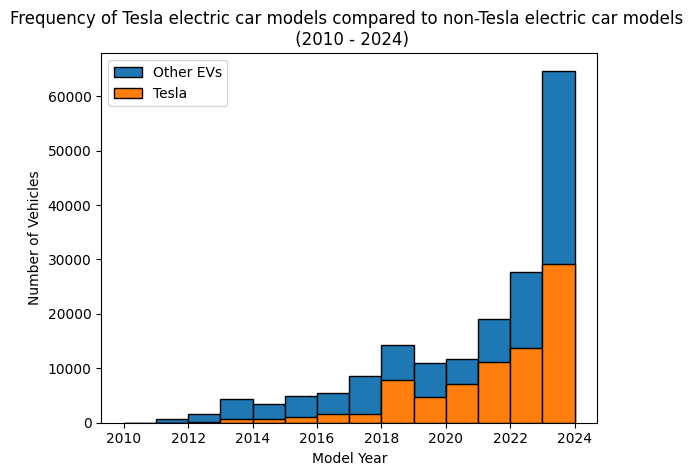

In [163]:
# Graph code
plt.hist(all_model_year["model_year"], bins = np.arange(2010, 2025, 1), label="Other EVs", ec="black")
plt.hist(tesla_model_year["model_year"], bins = np.arange(2010, 2025, 1), label="Tesla", ec="black")
plt.title("Frequency of Tesla electric car models compared to non-Tesla electric car models \n (2010 - 2024)")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.legend()


In the histogram, where the x-axis represents the model year and the y-axis shows the number of cars, we can compare how often Tesla electric car models appear versus non-Tesla electric car models. This allows us to see if there are more Teslas or non-Teslas in the dataset and understand their relative presence across different model years. In this case, you can see the that Tesla cars account for about half of the vehicle population from the years 2018 to 2024. 

For Phase 3 Grading:
    
* Who made this graph?  Ifrahim Ansari
* Who asked the question?  Ifrahim Ansari
* Who did the write-up?  Ifrahim Ansari
* Any other tasks someone did that you want to explain: None

---

## Playground  

In this section, you will esssentially build the results that filter into your Results Section and Final Report.  

Add code/markdown cells below as needed.  As you find really nice graphs/results,  decide with your teammate(s) if they are worthy of showing me.  Just because you build a graph does not mean you are submitting it to me.  In the real world, there is a lot of analysis that is done "behind the scences" and not included in the final report.

At the end of Phase 3, pick 3 of your visualizations and add them to Section 3, filling out the details of Section 3.1/3.2/3.3 above.  You should show me a variety of graphs, ie, you should not be submitting just 3 line graphs.

* For Phase 3, I only want to see the graphs we discussed in class:  line graphs, scatter plots, bar graphs, histograms.

In [51]:
sql_statement = """
                SELECT *
                FROM ev
                """

results_1 = pd.read_sql_query(sql_statement, conn)
results_1

,vin,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,longitude,latitude,electric_utility,census_tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,-122.308390,47.610365,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,-122.179458,47.802589,PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,-122.348480,47.632405,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,-122.036460,47.534065,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,-122.557170,47.733415,PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,-122.183805,47.180620,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,-123.105305,47.211085,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,-119.849387,47.233993,PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,-122.004510,47.312185,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [10]:
sql_statement = """
                SELECT *
                FROM ev                
                """

results = pd.read_sql_query(sql_statement, conn)
results

,vin,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,longitude,latitude,electric_utility,census_tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,-122.308390,47.610365,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,-122.179458,47.802589,PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,-122.348480,47.632405,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,-122.036460,47.534065,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,-122.557170,47.733415,PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,-122.183805,47.180620,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,-123.105305,47.211085,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,-119.849387,47.233993,PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,-122.004510,47.312185,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [153]:
sql_statement = """
                SELECT *, electric_range
                FROM ev
                WHERE make = 'TESLA' AND model_year = 2023
                """

tesla_2024 = pd.read_sql_query(sql_statement, conn)
tesla_2024

,vin,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,longitude,latitude,electric_utility,census_tract,electric_range
0,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,-122.179458,47.802589,PUGET SOUND ENERGY INC,5.306105e+10,0
1,5YJ3E1EA5P,Thurston,Lacey,WA,98516.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,260749422,-122.747429,47.082112,PUGET SOUND ENERGY INC,5.306701e+10,0
2,7SAYGDEE7P,Yakima,Yakima,WA,98908.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,240646983,-120.602720,46.596562,PACIFICORP,5.307700e+10,0
3,7SAYGDEE3P,Grant,Quincy,WA,98848.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,256285200,-119.849387,47.233993,PUD NO 2 OF GRANT COUNTY,5.302501e+10,0
4,7SAYGDEE7P,Skagit,Anacortes,WA,98221.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,245748499,-122.615305,48.501275,PUGET SOUND ENERGY INC,5.305794e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28645,7SAYGDEE1P,King,Auburn,WA,98001.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,47.0,262187831,-122.284939,47.338406,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,0
28646,5YJ3E1EAXP,King,Newcastle,WA,98059.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,255076727,-122.157340,47.487175,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,0
28647,5YJ3E1EB6P,King,Redmond,WA,98053.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,245445196,-122.022280,47.695900,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,0
28648,7SAYGDEF4P,King,Seattle,WA,98112.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,227285313,-122.307640,47.625230,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,0


In [12]:
sql_statement = """
                SELECT *, electric_range
                FROM ev
                WHERE make = 'TESLA' AND electric_range != 0
                """

tesla = pd.read_sql_query(sql_statement, conn)
tesla

,vin,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,longitude,latitude,electric_utility,census_tract,electric_range
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,-122.308390,47.610365,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,291
1,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,-122.348480,47.632405,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,270
2,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,-122.036460,47.534065,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,210
3,5YJYGDEEXL,King,Seattle,WA,98144.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,113323024,-122.308230,47.581975,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,291
4,5YJ3E1EB4L,King,Seattle,WA,98126.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,34.0,121690915,-122.374105,47.544680,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25577,5YJXCBE28J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,21.0,475904495,-122.375070,47.808070,PUGET SOUND ENERGY INC,5.306105e+10,238
25578,5YJ3E1EBXJ,Benton,Kennewick,WA,99338.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,16.0,177537027,-119.197300,46.191149,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,5.300501e+10,215
25579,5YJ3E1EA8J,Snohomish,Everett,WA,98203.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,38.0,160838149,-122.213105,47.954790,PUGET SOUND ENERGY INC,5.306104e+10,215
25580,5YJ3E1EB2K,King,Issaquah,WA,98029.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,41.0,172843891,-121.999366,47.548487,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,220


In [8]:
sql_statement = """
                SELECT *, electric_range
                FROM ev
                WHERE electric_range != 0
                """

electric_range_no_zeros = pd.read_sql_query(sql_statement, conn)
electric_range_no_zeros

,vin,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,longitude,latitude,electric_utility,census_tract,electric_range
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,-122.308390,47.610365,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,291
1,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,-122.348480,47.632405,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,270
2,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,-122.036460,47.534065,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,210
3,3FA6P0SU8H,Thurston,Yelm,WA,98597.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,2.0,122057736,-122.610230,46.941260,PUGET SOUND ENERGY INC,5.306701e+10,21
4,1N4AZ0CP2D,Yakima,Yakima,WA,98903.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,14.0,150126840,-120.477805,46.553505,PACIFICORP,5.307700e+10,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85911,JTMFB3FV0N,King,Kent,WA,98032.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,33.0,252768939,-122.235475,47.380900,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,42
85912,5YJ3E1EB2K,King,Issaquah,WA,98029.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,41.0,172843891,-121.999366,47.548487,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,220
85913,5YJ3E1EB0J,Spokane,Mead,WA,99021.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,7.0,244100594,-117.357610,47.768850,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10,215
85914,1N4AZ0CP0F,Mason,Shelton,WA,98584.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,35.0,165408603,-123.105305,47.211085,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10,84


In [20]:
sql_statement = """
                SELECT *
                FROM ev
                WHERE model_year BETWEEN 2020 AND 2025
                """

results2 = pd.read_sql_query(sql_statement, conn)
results2

,vin,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,longitude,latitude,electric_utility,census_tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,-122.308390,47.610365,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,-122.179458,47.802589,PUGET SOUND ENERGY INC,5.306105e+10
2,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,-122.557170,47.733415,PUGET SOUND ENERGY INC,5.303594e+10
3,5UXTA6C03N,King,Auburn,WA,98001.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,47.0,240226332,-122.284939,47.338406,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEEXL,King,Seattle,WA,98144.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,113323024,-122.308230,47.581975,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123338,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,-122.183805,47.180620,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
123339,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,-123.105305,47.211085,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
123340,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,-119.849387,47.233993,PUD NO 2 OF GRANT COUNTY,5.302501e+10
123341,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,-122.004510,47.312185,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


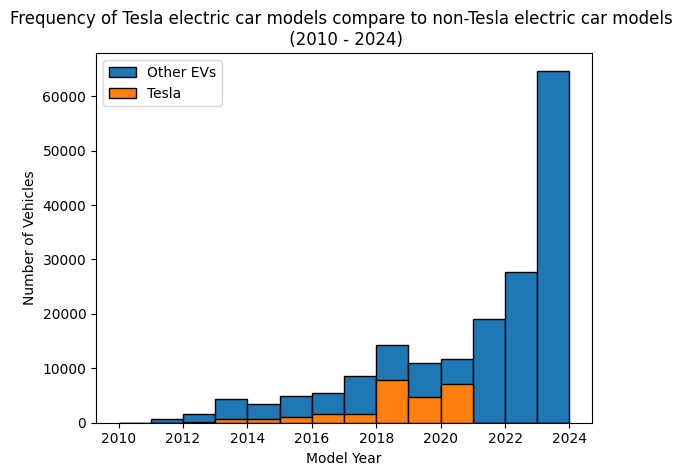

In [24]:
plt.hist(results["model_year"], bins = np.arange(2010, 2025, 1), label="Other EVs", ec="black")
plt.hist(tesla["model_year"], bins = np.arange(2010, 2025, 1), label="Tesla", ec="black")
plt.title("Frequency of Tesla electric car models compare to non-Tesla electric car models \n (2010 - 2024)")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.legend()

# "How does the frequency of Tesla electric car models compare to non-Tesla electric car models?"


In [144]:
sql_statement = """
                SELECT model_year, AVG(electric_range) AS avg_range_1
                FROM ev
                WHERE electric_range != 0
                GROUP BY model_year
                """

something = pd.read_sql_query(sql_statement, conn)
something

,model_year,avg_range_1
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.212608


In [135]:
sql_statement = """
                SELECT DISTINCT(make), model, model_year, electric_range
                FROM ev
                WHERE electric_range != 0 AND model_year = 2012
                """

something1 = pd.read_sql_query(sql_statement, conn)
something1

,make,model,model_year,electric_range
0,NISSAN,LEAF,2012,73
1,CHEVROLET,VOLT,2012,35
2,TOYOTA,PRIUS PLUG-IN,2012,6
3,FISKER,KARMA,2012,33
4,TESLA,MODEL S,2012,265
5,MITSUBISHI,I-MIEV,2012,62
6,TOYOTA,RAV4,2012,103
7,FORD,FOCUS,2012,76
8,AZURE DYNAMICS,TRANSIT CONNECT ELECTRIC,2012,56


In [137]:
sql_statement = """
                SELECT model_year, AVG(DISTINCT(electric_range)) AS avg_range
                FROM ev
                WHERE electric_range != 0
                GROUP BY model_year
                """

something1 = pd.read_sql_query(sql_statement, conn)
something1

,model_year,avg_range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,172.500000
8,2011,101.800000
9,2012,78.777778


In [131]:
sql_statement = """
                SELECT make, model, model_year, electric_range
                FROM ev
                WHERE model_year = 2022 AND electric_range != 0 AND make = "TESLA"
                """

something3 = pd.read_sql_query(sql_statement, conn)
something3

,make,model,model_year,electric_range


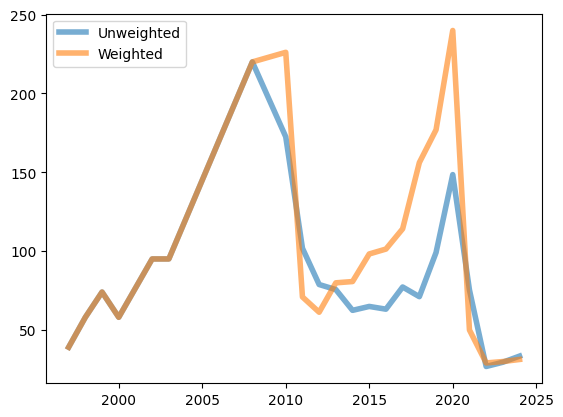

In [169]:
plt.plot(something1["model_year"], something1["avg_range"], label="Unweighted", alpha=0.6, linewidth=4)
plt.plot(something["model_year"], something["avg_range_1"], label="Weighted", alpha=0.6, linewidth=4)
plt.legend()
#Does the electric range go up as the model_years increase?

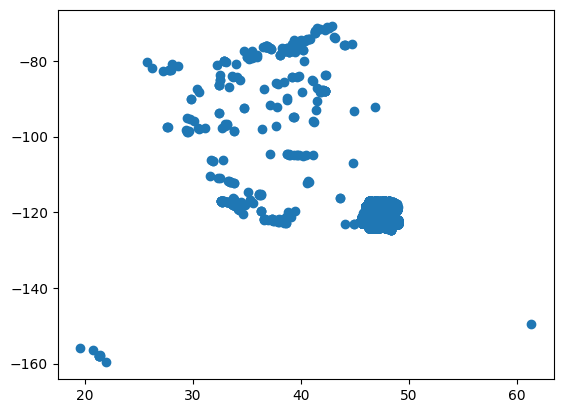

In [52]:
plt.scatter(results_1["latitude"], results_1["longitude"])

In [ ]:
# Go to your visualization labs and get example code to draw some graphs hee.

----

### Reminders before submitting for Phase 3 (or any submission)

* There should be no crappy "text" printed before each picture.
    * Add a semicolon to the last line int he code cell to prevent this.
* In each code cell, there must be a code comment explaining what is going on in the code cell.
    * NOOOOOOO results should be discussed in the hashtag areas
    * Example of a good code comment:  #In this code cell, we build a line graph of the number of reservations across time.
* If there is anything special going on in the SQL or the code cell, that should be documented as well in a code comment or in the discussion before the code cell, if appropriate.
    * For example, if you are filtering on a special condition (like where tuition > 0 for some reason) then explain why.
* Correlation does NOT imply causation so don't accidentally use lingo that suggests that "variable X" is CAUSING some change in varaiable Y:
    * SHOULD NOT SAY:  
        * X is impacting Y
        * X causes Y
        * X contributes to Y
    * Instead, just keep your lingo speculative and then you can make guesses:
      * It is possible that we see this effect because of XXX.
      * Perhaps this makes sense because XXX.

